Import

In [253]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [254]:
# Charger le dataset
df_base = pd.read_csv('data.csv', sep=';')
pd.set_option('display.max_columns', None) 
df = df_base.drop_duplicates()
df.columns = df.columns.str.lower()

EDA

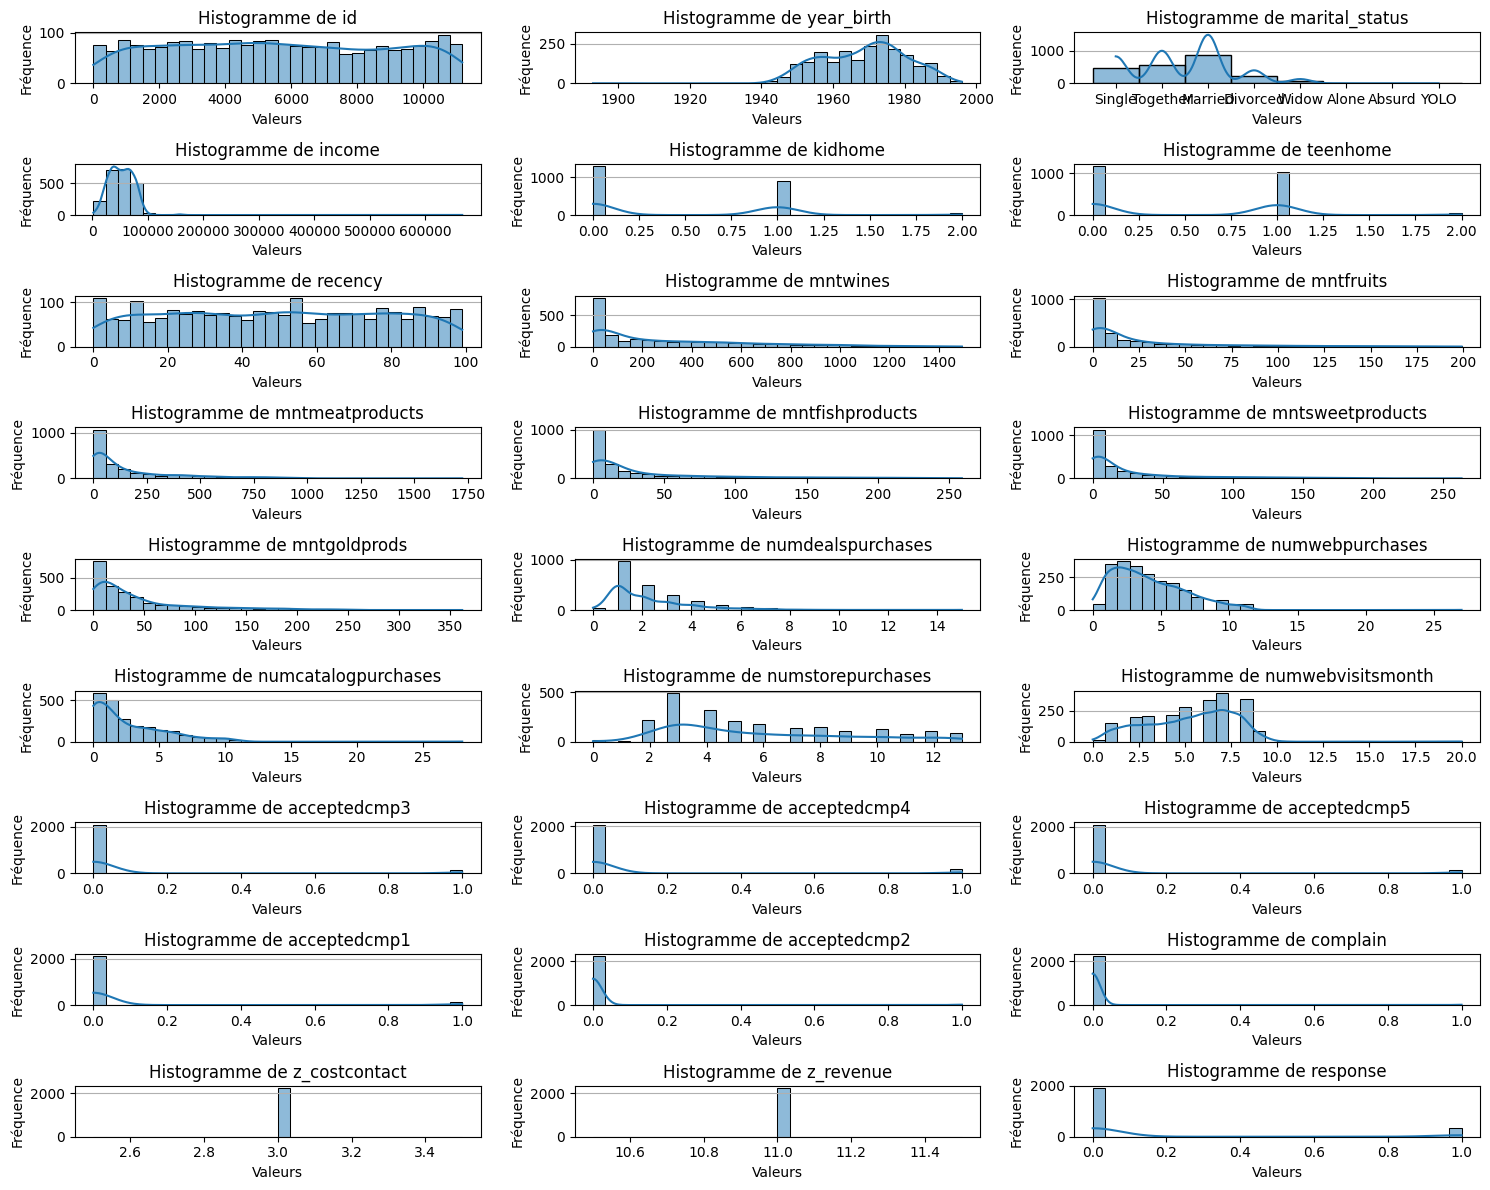

In [255]:
# Distribution des valeurs
cols = df.drop(columns=['education', 'dt_customer']).columns

# Définir le nombre de lignes et de colonnes pour les subplots
n_cols = 3
n_rows = len(cols) // n_cols + (len(cols) % n_cols > 0)  # Arrondi vers le haut si besoin
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Boucle à travers les colonnes pour créer des histogrammes
for i, col in enumerate(cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  # Utiliser l'axe spécifique
    axes[i].set_title(f'Histogramme de {str(col)}')
    axes[i].set_xlabel('Valeurs')
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(axis='y')

# Supprimer les axes inutilisés (s'ils existent)
if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
plt.show()


In [256]:
# Supposons que df est déjà défini et que tu as les colonnes que tu veux analyser
cols = df.drop(columns=['education', 'dt_customer', 'live_alone']).columns

# Définir le nombre de lignes et de colonnes pour les subplots
n_cols = 3
n_rows = len(cols) // n_cols + (len(cols) % n_cols > 0)  # Arrondi vers le haut si besoin
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Boucle à travers les colonnes pour créer des Q-Q plots
for i, col in enumerate(cols):
    data = df[col].dropna()  # Supprimer les NaN
    if len(data) > 1:  # Vérifier que la longueur est suffisante
        stats.probplot(data, dist="norm", plot=axes[i])  # Utiliser l'axe spécifique
        axes[i].set_title(f'Q-Q Plot de {str(col)}')
    else:
        axes[i].set_title(f'Pas assez de données pour {str(col)}')  # Titre pour les colonnes insuffisantes
    axes[i].grid(axis='y')

# Supprimer les axes inutilisés (s'ils existent)
if len(cols) < len(axes):
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
plt.show()

KeyError: "['live_alone'] not found in axis"

In [238]:
df.head()

,id,age,education,live_alone,income,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,n_children,live_alone,n_familly,n_accepted_
0,5524,67,2.0,1,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0,1,2,0
1,2174,70,2.0,1,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,2,1,4,0
2,4141,59,2.0,0,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,2,0
3,6182,40,2.0,0,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,1,0,3,0
4,5324,43,4.0,0,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,1,0,3,0


In [153]:
df['response'].value_counts()

response
0    1906
1     334
Name: count, dtype: int64

In [131]:
df['marital_status'].value_counts()

marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [249]:
# Description générale du dataset
print("Description générale du dataset:")
print(f"Nombre total d'observations : {df.shape[0]}")
print(f"Nombre total de variables : {df.shape[1]}")
print(f"Types de données : \n{df.dtypes}")

# Liste des variables
print("\nListe des variables:")
print(df.columns.tolist())

# Statistiques descriptives pour les variables numériques
print("\nStatistiques descriptives pour les variables numériques:")
print(df.describe())

# Statistiques descriptives pour les variables catégorielles
print("\nStatistiques descriptives pour les variables catégorielles:")
print(df.describe(include=['object', 'category']))

# Valeurs manquantes
print("\nValeurs manquantes dans le dataset:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Valeurs aberrantes - par exemple pour les variables numériques
print("\nValeurs aberrantes (5 premières lignes) :")
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"\nValeurs aberrantes pour {column}:")
    print(df[column][df[column] > df[column].mean() + 2.8 * df[column].std()])  # Z-score > 3

# matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
correlation_matrix = df.drop(columns=['marital_status', 'education', 'dt_customer']).dropna().corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, annot_kws={'size' : 8})
plt.title('Matrice de corrélation')
plt.show()


Description générale du dataset:
Nombre total d'observations : 2240
Nombre total de variables : 24
Types de données : 
id                       int64
age                      int64
education              float64
live_alone               int64
income                 float64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
complain                 int64
response                 int64
n_children               int64
live_alone               int64
n_familly                int64
n_accepted_              int64
dtype: object

Liste des variables:
['id', 'age', 'education', 'live_alone', 'income', 'dt_customer', 'recency', 'mntwines', 'mntfruits',

KeyError: "['marital_status' 'education' 'dt_customer'] not found in axis"

<Figure size 1200x1000 with 0 Axes>

In [139]:
correlation_matrix[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'complain']]

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5,complain
id,-0.018219,-0.014994,-0.035890,-0.023933,-0.007064,0.034154
year_birth,-0.009611,-0.006717,0.061784,-0.066109,0.010575,-0.030407
income,0.276820,0.087545,-0.016174,0.184400,0.335943,-0.027225
kidhome,-0.174163,-0.081868,0.016066,-0.162026,-0.205305,0.040978
teenhome,-0.144855,-0.015521,-0.042522,0.038376,-0.190791,0.003307
recency,-0.021061,-0.001400,-0.032257,0.017566,-0.000482,0.013637
mntwines,0.351417,0.206185,0.061463,0.373143,0.473550,-0.039470
mntfruits,0.191816,-0.009980,0.014424,0.006396,0.212871,-0.005324
mntmeatproducts,0.313076,0.043521,0.018438,0.091618,0.376867,-0.023782
mntfishproducts,0.261608,0.002345,-0.000219,0.016105,0.196277,-0.021220


In [135]:
df["z_revenue"].value_counts()

z_revenue
11    2240
Name: count, dtype: int64

In [136]:
# Suppression des variables sans variance
df = df.drop(columns=['z_revenue', 'z_costcontact'])

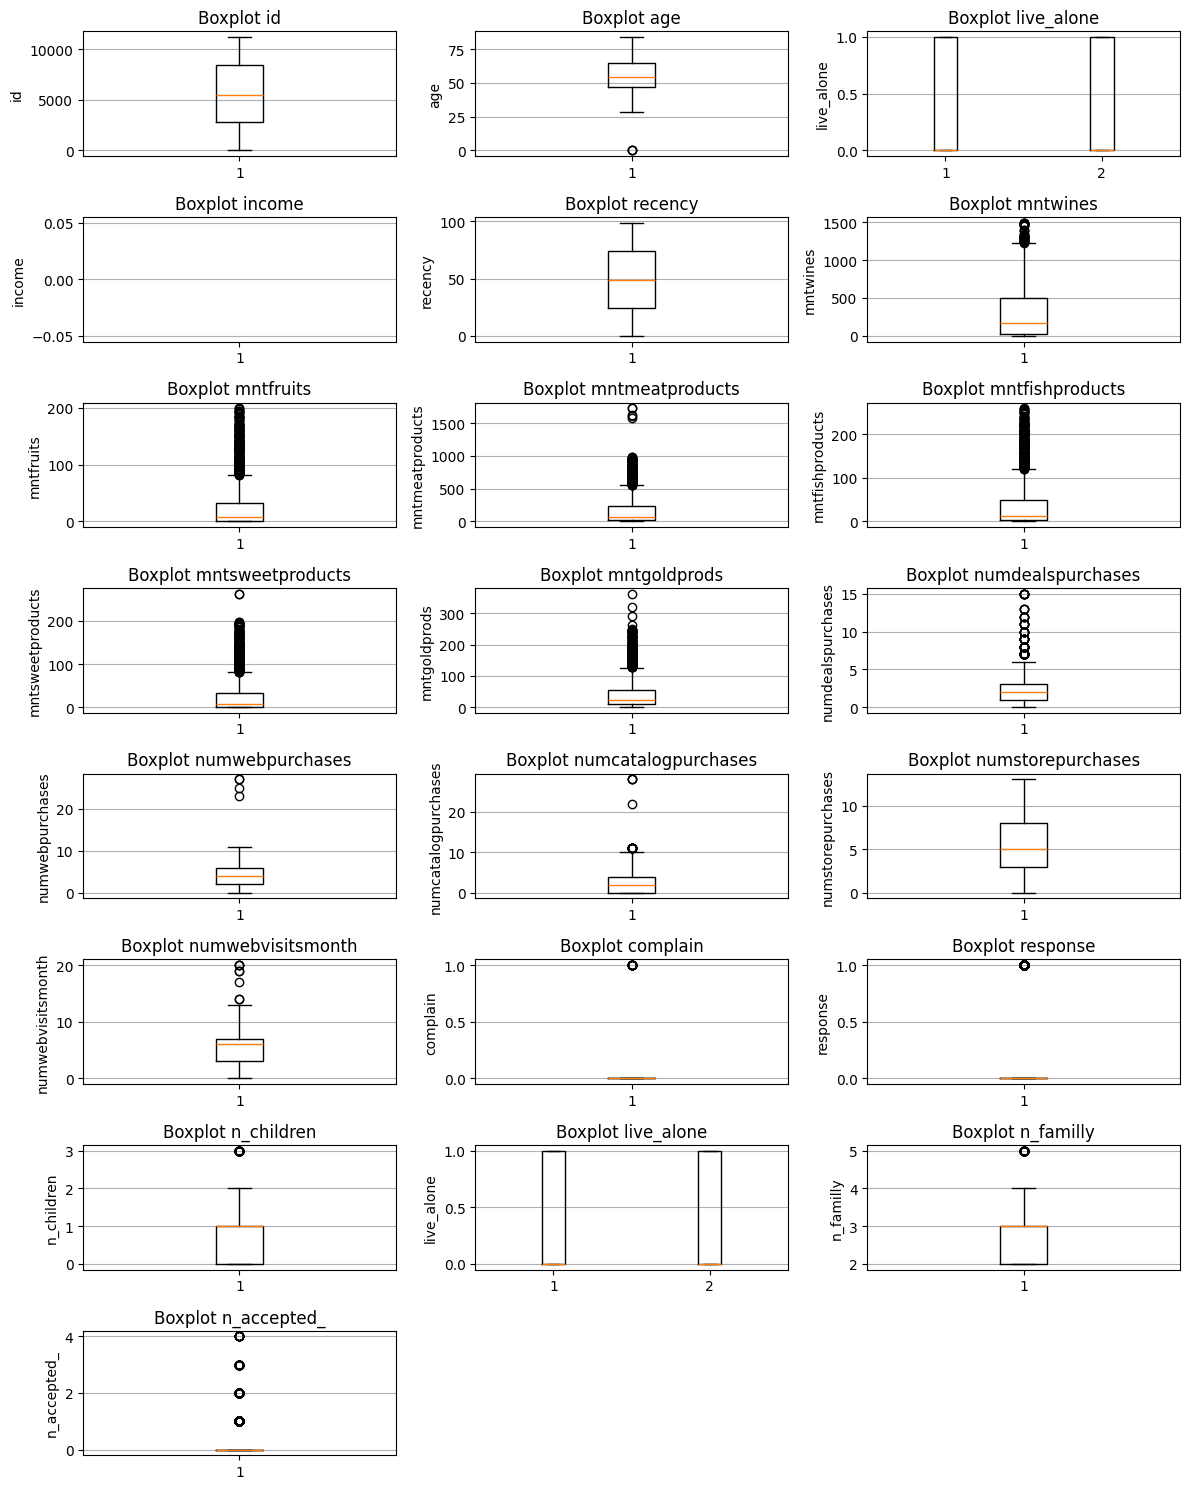

In [234]:
### Générer boxplot pour valeurs aberrantes

cols = df.drop(columns=['education', 'dt_customer']).columns

fig, axes = plt.subplots(nrows=len(cols)//3 + 1, ncols=3, figsize=(12, 15))  # 3 colonnes, lignes dynamiques

axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot {str(col)}')
    axes[i].set_ylabel(str(col))
    axes[i].grid(axis='y')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Remplacer les valeurs nullles et aberrantes

In [231]:
for column in df.select_dtypes(include=[np.number]).columns:  # Sélectionne uniquement les colonnes numériques
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Définir les seuils
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remplacer les valeurs aberrantes par NaN
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])

KeyError: "None of [Index([('l', 'i', 'v', 'e', '_', 'a', 'l', 'o', 'n', 'e'), ('l', 'i', 'v', 'e', '_', 'a', 'l', 'o', 'n', 'e')], dtype='object')] are in the [index]"

In [170]:
df['marital_status'] = df['marital_status'].apply(lambda x: "Married" if (x == "YOLLO" or x == "Absurd" or x == "Together") else x)

df['marital_status'] = df['marital_status'].apply(lambda x: "Single" if (x == "Divorced" or x == "Widow" or x == "Alone") else x)

In [171]:
df = df.drop(columns=[''])

marital_status
Married    1448
Single      792
Name: count, dtype: int64

In [143]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df.drop(columns=['marital_status', 'education', 'dt_customer']))

In [145]:
from sklearn.impute import KNNImputer
import pandas as pd

# Supposons que 'Marital_Status', 'Education', 'Dt_Customer' sont des colonnes non numériques ou que tu veux exclure
df_to_impute = df.drop(columns=['marital_status', 'education', 'dt_customer'])

# Initialisation du KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Applique le KNN imputer
df_imputed_array = imputer.fit_transform(df_to_impute)

# Reconversion en DataFrame avec les noms de colonnes originaux
df_imputed = pd.DataFrame(df_imputed_array, columns=df_to_impute.columns, index=df.index)

# Si nécessaire, réinsérer les colonnes non imputées (Marital_Status, Education, Dt_Customer)
df_without_na = pd.concat([df_imputed, df[['marital_status', 'education', 'dt_customer']]], axis=1)

Encoder variable catégorielle

In [192]:
label_encoder = LabelEncoder()
label_encoder.fit(df['marital_status'])
df["marital_status"] = label_encoder.transform(df['marital_status'])

In [183]:
df["live_alone"].value_counts()

live_alone
0    1448
1     792
Name: count, dtype: int64

In [209]:
ordinal_encoder = OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation','Master', 'PhD']]) 
df['education'] = ordinal_encoder.fit_transform(df[['education']])

# target_encoder = TargetEncoder(cols=['product_type', 'family_status'], smoothing=1.0)
# df_without_na[['Marital_Status']] = target_encoder.fit_transform(df[['product_type', 'family_status']], df['bad_client_target'])

df_without_na.head()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,marital_status,education,dt_customer
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Single,2.0,2012-09-04
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Single,2.0,2014-03-08
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Together,2.0,2013-08-21
3,6182.0,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Together,2.0,2014-02-10
4,5324.0,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Married,4.0,2014-01-19


Distribution des classes

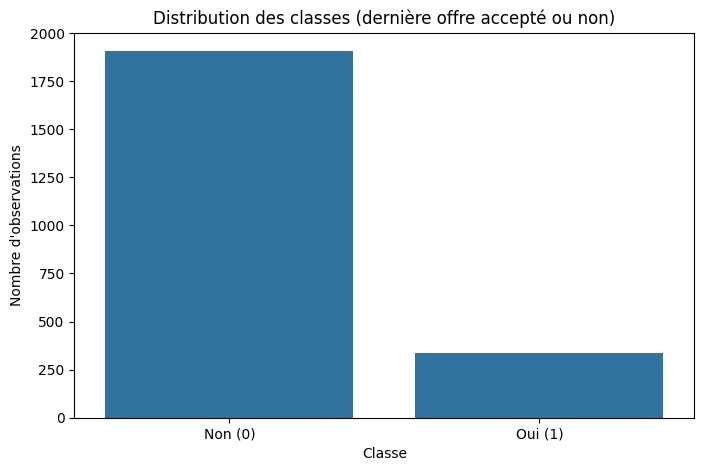

In [186]:
# Distrib classe offre accepté

plt.figure(figsize=(8, 5))
sns.countplot(x='response', data=df)
plt.title('Distribution des classes (dernière offre accepté ou non)')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'observations')
plt.xticks(ticks=[0, 1], labels=['Non (0)', 'Oui (1)'])
plt.show()

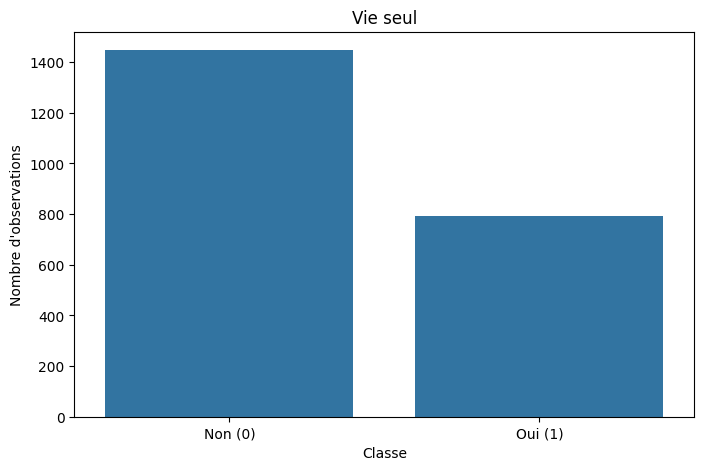

In [190]:
# Distrib classe seul ou en couple

plt.figure(figsize=(8, 5))
sns.countplot(x='live_alone', data=df)
plt.title('Vie seul')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'observations')
plt.xticks(ticks=[0, 1], labels=['Non (0)', 'Oui (1)'])
plt.show()

Nouvelles variables

In [200]:
df.rename(columns={'marital_status': 'live_alone'}, inplace=True)

In [205]:
df.rename(columns={'year_birth': 'age'}, inplace=True)
df['age'] = 2024 - df['age']

In [222]:
df.head()

,id,age,education,live_alone,income,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,n_children,live_alone,n_familly,n_accepted_
0,5524,67,2.0,1,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0,1,2,0
1,2174,70,2.0,1,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,2,1,4,0
2,4141,59,2.0,0,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,2,0
3,6182,40,2.0,0,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,1,0,3,0
4,5324,43,4.0,0,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,1,0,3,0


In [217]:
df.columns

Index(['id', 'age', 'education', 'live_alone', 'income', 'dt_customer',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'complain', 'response',
       'n_children', 'live_alone', 'n_familly', 'n_accepted_'],
      dtype='object')

In [203]:
df['n_children'] = df['kidhome'] + df['teenhome']
for cel in df['live_alone']:
    if cel == 1 :
        df['n_familly'] = df['n_children'] + 1
    else :
        df['n_familly'] = df['n_children'] + 2

df = df.drop(columns= ['kidhome', 'teenhome'])

In [216]:
df['n_accepted_'] = df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5'] 
df = df.drop(columns=['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5'])

In [152]:
final_df.value_counts()

n_accepted_
0              1777
1               325
2                83
3                44
4                11
Name: count, dtype: int64

In [ ]:
df_without_na['Dt_Customer_timestamp'] = pd.to_datetime(df['st_customer']).astype('int64') // 10**9